## Get dataframe with images and labels

In [7]:
import pandas as pd
import numpy as np
import urllib
import sys
from tqdm import tqdm
sys.path.append('../taxonomy')
from streamlit_preparation import initialize, get_sample, queryFile
from utilities import normalize_title
from queryLabel import Taxonomy

## Using streamlit_preaparation
Not really working, getting error `RuntimeError: CUDA error: out of memory`

In [ ]:
files, taxonomy = initialize()
print(files.shape)
# files.head(10)

In [ ]:
n = 100_000
seed = int(args.seed) if args.seed else 0
files_sample = get_sample(n, seed)
tqdm.pandas()
files_sample[['labels', 'log']] = files_sample.progress_apply(lambda x: queryFile(x), 
                                                              axis=1, result_type="expand")

## As before

In [27]:
CATEGORIES_PATH = '/scratch/WikipediaImagesTaxonomy/commonswiki-20220220-category-network.parquet'
FILES_PATH = '/scratch/WikipediaImagesTaxonomy/commonswiki-20220220-files.parquet'
files = pd.read_parquet(FILES_PATH)
print(files.shape)
files.head()

(3891446, 4)


,id,title,url,categories
0,80902489,"""A Gathering of Court Women"", Folio from the D...",c/c1/%22A_Gathering_of_Court_Women%22%2C_Folio...,"[Department of Islamic Art, Metropolitan Museu..."
1,53631642,"""Akdeniz"" - Aliağa, 2016.jpg",f/f8/%22Akdeniz%22_-_Alia%C4%9Fa%2C_2016.jpg,"[Akdeniz (ship, 1955), Aliağa ship-breaking yard]"
2,74785910,"""Carnevale di Torino"". Felice Cerruti - f.lli ...",1/13/%22Carnevale_di_Torino%22._Felice_Cerruti...,"[Felice Cerruti Bauduc, Victor Emmanuel II of ..."
3,14890941,"""Escena de playa con figura"".jpg",c/c2/%22Escena_de_playa_con_figura%22.jpg,"[Pedro Lira, People with dogs in art]"
4,17828296,"""Florero con plátanos, limones y libros"", Juan...",d/da/%22Florero_con_pl%C3%A1tanos%2C_limones_y...,"[Works by Juan de Echevarría, Still-life paint..."


In [28]:
segment_nr = 0
segment_frame = pd.read_csv('/scratch/WIT_Dataset/wit_v1.train.all-0000' + str(segment_nr) + '-of-00010.tsv.gz', compression='gzip', sep='\t')
segment_frame_en = segment_frame[segment_frame.language == 'en']
print(segment_frame_en.shape)
segment_frame_en['image_name'] = segment_frame_en['image_url'].apply(lambda url : normalize_title(url.split('/')[-1], dumps=False))
segment_frame_en.head()

(542593, 17)


<ipython-input-28-404b15187c80>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_frame_en['image_name'] = segment_frame_en['image_url'].apply(lambda url : normalize_title(url.split('/')[-1], dumps=False))


,language,page_url,image_url,page_title,section_title,hierarchical_section_title,caption_reference_description,caption_attribution_description,caption_alt_text_description,mime_type,original_height,original_width,is_main_image,attribution_passes_lang_id,page_changed_recently,context_page_description,context_section_description,image_name
0,en,https://en.wikipedia.org/wiki/Oxydactylus,https://upload.wikimedia.org/wikipedia/commons...,Oxydactylus,NaN,Oxydactylus,NaN,English: Mounted skeleton of Oxydactylus longi...,NaN,image/jpeg,3564,2748,True,True,False,Oxydactylus is an extinct genus of camelid end...,Oxydactylus is an extinct genus of camelid end...,Oxydactylus longipes fm.jpg
5,en,https://en.wikipedia.org/wiki/Maine%27s_3rd_co...,https://upload.wikimedia.org/wikipedia/commons...,Maine's 3rd congressional district,List of members representing the district,Maine's 3rd congressional district / List of m...,NaN,"English: Samuel W. Gould, US Representative fr...",NaN,image/jpeg,1870,1421,False,True,False,Maine's 3rd congressional district is an obsol...,NaN,SamuelWGould.jpg
7,en,https://en.wikipedia.org/wiki/Cheraw,https://upload.wikimedia.org/wikipedia/commons...,Cheraw,18th century,Cheraw / History / 18th century,A c. 1724 English copy of a deerskin Catawba m...,"English: ""Map of the Several Nations of Indian...",NaN,image/jpeg,1217,1770,False,True,False,"The Cheraw people, also known as the Saraw or ...","In 1710, due to attacks by the Seneca of the I...",Indians NW of South Carolina.jpg
13,en,https://en.wikipedia.org/wiki/Romanian_Front,https://upload.wikimedia.org/wikipedia/commons...,Romanian Front,Stagnation,Romanian Front / History / Stagnation,"Nameplate of Gazeta Transilvaniei on June 14, ...",English: Nameplate of the Romanian nationalist...,NaN,image/png,306,960,False,True,True,The Romanian Front was a moderate fascist part...,A reshuffled Tătărescu government took over in...,"Gazeta Transilvaniei with FR logo, June 14, 19..."
18,en,https://en.wikipedia.org/wiki/%C3%81d%C3%A1m_K...,https://upload.wikimedia.org/wikipedia/commons...,Ádám Kósa,NaN,Ádám Kósa,NaN,English: Hungarian MEP Ádám Kósa,NaN,image/jpeg,4928,3264,True,False,True,Ádám Kósa is a Hungarian politician and Member...,Ádám Kósa (born 1 July 1975) is a Hungarian po...,Ádám Kósa 01.JPG


In [29]:
image_labels = segment_frame_en.merge(files, left_on=['image_name'], right_on=['title'])
print(image_labels.shape)
image_labels = image_labels[['page_url', 'image_url', 'page_title', 'image_name', 'id', 'title', 'url', 'categories']]
image_labels.head()

(535099, 22)


,page_url,image_url,page_title,image_name,id,title,url,categories
0,https://en.wikipedia.org/wiki/Oxydactylus,https://upload.wikimedia.org/wikipedia/commons...,Oxydactylus,Oxydactylus longipes fm.jpg,20018707,Oxydactylus longipes fm.jpg,5/5f/Oxydactylus_longipes_fm.jpg,"[Oxydactylus longipes fossils, Camelidae skele..."
1,https://en.wikipedia.org/wiki/Maine%27s_3rd_co...,https://upload.wikimedia.org/wikipedia/commons...,Maine's 3rd congressional district,SamuelWGould.jpg,10648163,SamuelWGould.jpg,7/7d/SamuelWGould.jpg,"[1852 births, 1935 deaths, Members of the Unit..."
2,https://en.wikipedia.org/wiki/Cheraw,https://upload.wikimedia.org/wikipedia/commons...,Cheraw,Indians NW of South Carolina.jpg,52152020,Indians NW of South Carolina.jpg,2/2d/Indians_NW_of_South_Carolina.jpg,"[1724 maps, Old maps of South Carolina, 18th-c..."
3,https://en.wikipedia.org/wiki/Romanian_Front,https://upload.wikimedia.org/wikipedia/commons...,Romanian Front,"Gazeta Transilvaniei with FR logo, June 14, 19...",70615587,"Gazeta Transilvaniei with FR logo, June 14, 19...",4/4a/Gazeta_Transilvaniei_with_FR_logo%2C_June...,"[Gazeta Transilvaniei, Fascism in Romania, Ant..."
4,https://en.wikipedia.org/wiki/%C3%81d%C3%A1m_K...,https://upload.wikimedia.org/wikipedia/commons...,Ádám Kósa,Ádám Kósa 01.JPG,30998346,Ádám Kósa 01.JPG,0/01/%C3%81d%C3%A1m_K%C3%B3sa_01.JPG,"[Ádám Kósa, Portrait photographs of men with g..."


In [ ]:
taxonomy = Taxonomy()
taxonomy.load_categories(CATEGORIES_PATH)
taxonomy.set_taxonomy(mapping='content_extended')

In [ ]:
image_labels['new_labels'] = image_labels['categories'].apply(lambda categories : [taxonomy.get_label(cat, how='naive') for cat in categories])
image_labels['new_labels'] = image_labels['new_labels'].apply(lambda labels : np.unique(np.array([element for items in labels for element in items])))

In [ ]:
image_labels.head(10)

In [ ]:
non_empty_image_labels = image_labels[image_labels['new_labels'].str.len() != 0]
print(non_empty_image_labels.shape)
non_empty_image_labels.head()

In [3]:
non_empty_image_labels = pd.read_json('data/non_empty_image_labels.json.bz2')
non_empty_image_labels.head()

,page_url,image_url,page_title,image_name,id,title,url,categories,new_labels
0,https://en.wikipedia.org/wiki/Oxydactylus,https://upload.wikimedia.org/wikipedia/commons...,Oxydactylus,Oxydactylus longipes fm.jpg,20018707,Oxydactylus longipes fm.jpg,5/5f/Oxydactylus_longipes_fm.jpg,"[Oxydactylus longipes fossils, Camelidae skele...",[Places]
2,https://en.wikipedia.org/wiki/Cheraw,https://upload.wikimedia.org/wikipedia/commons...,Cheraw,Indians NW of South Carolina.jpg,52152020,Indians NW of South Carolina.jpg,2/2d/Indians_NW_of_South_Carolina.jpg,"[1724 maps, Old maps of South Carolina, 18th-c...","[Culture, History, Places]"
3,https://en.wikipedia.org/wiki/Romanian_Front,https://upload.wikimedia.org/wikipedia/commons...,Romanian Front,"Gazeta Transilvaniei with FR logo, June 14, 19...",70615587,"Gazeta Transilvaniei with FR logo, June 14, 19...",4/4a/Gazeta_Transilvaniei_with_FR_logo%2C_June...,"[Gazeta Transilvaniei, Fascism in Romania, Ant...","[Culture, Entertainment, History, Politics, So..."
4,https://en.wikipedia.org/wiki/%C3%81d%C3%A1m_K...,https://upload.wikimedia.org/wikipedia/commons...,Ádám Kósa,Ádám Kósa 01.JPG,30998346,Ádám Kósa 01.JPG,0/01/%C3%81d%C3%A1m_K%C3%B3sa_01.JPG,"[Ádám Kósa, Portrait photographs of men with g...","[People, Politics, Society]"
5,https://en.wikipedia.org/wiki/Grey_francolin,https://upload.wikimedia.org/wikipedia/commons...,Grey francolin,DecoyGreyFrancolin.jpg,8832997,DecoyGreyFrancolin.jpg,7/7e/DecoyGreyFrancolin.jpg,"[Francolinus pondicerianus (captive), Birds of...",[Places]


Calculate distribution of labels through the images.

In [8]:
label_dict = {}

for index, row in tqdm(non_empty_image_labels.iterrows(), total=non_empty_image_labels.shape[0]):
    for label in row.new_labels:
        if label in label_dict:
            label_dict[label] += 1
        else:
            label_dict[label] = 1        

100%|██████████| 284558/284558 [00:16<00:00, 17523.81it/s]


Unique keys: 41


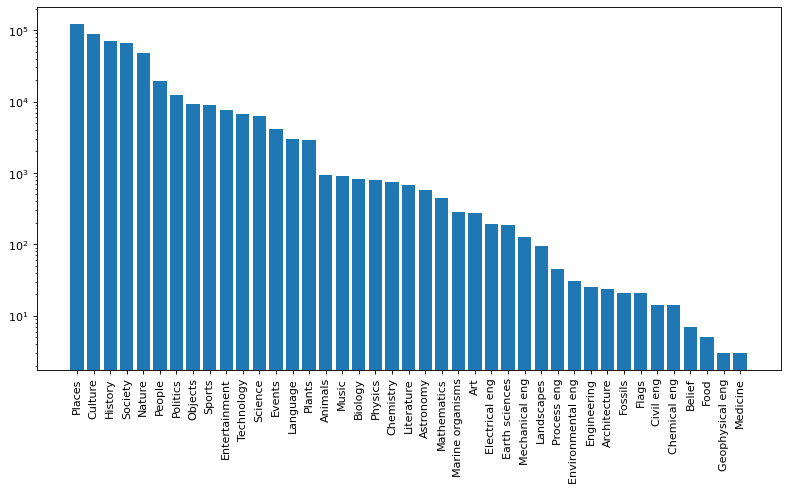

In [26]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(12, 6), dpi=80)
print(f'Unique keys: {len(label_dict.keys())}')

sorted_dict = dict(sorted(label_dict.items(), key=lambda item: item[1], reverse=True))

_ = plt.bar(range(len(sorted_dict)), list(sorted_dict.values()), align='center')
_ = plt.xticks(range(len(sorted_dict)), list(sorted_dict.keys()), rotation=90)
_ = plt.yscale('log')

In [ ]:
non_empty_image_labels.to_json(f'data/non_empty_image_labels_segment_{segment_nr}.json.bz2', compression='bz2')